In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
type(fashion_mnist)

2024-06-15 05:20:55.574216: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 05:20:55.574329: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 05:20:55.691496: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


tuple

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]

In [4]:
X_train.shape

(55000, 28, 28)

In [5]:
X_train.dtype

dtype('uint8')

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
y_train[0]

9

In [8]:
# Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [9]:
#Here are the corresponding class names:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
# Creating the model using the sequential API

tf.random.set_seed(42)
model = tf.keras.Sequential() # using sequential model
model.add(tf.keras.layers.Input(shape = [28, 28])) # adding input layer specifying input size
model.add(tf.keras.layers.Flatten()) # it will convert the input into 1d array
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [13]:
hidden1 = model.get_layer("dense")
hidden1.name

'dense'

In [14]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.05739152,  0.00887273,  0.04877106, ..., -0.03485174,
        -0.05337121,  0.02290916],
       [ 0.01157194,  0.02112556, -0.06685875, ...,  0.05842575,
        -0.02721214,  0.03198934],
       [ 0.02168585, -0.01126058, -0.01573211, ..., -0.06072019,
         0.07071109,  0.06164694],
       ...,
       [ 0.05506718,  0.05858292, -0.00825483, ...,  0.02393039,
        -0.06003764, -0.01623535],
       [-0.01268491, -0.02567306,  0.0485451 , ...,  0.03724683,
        -0.04829546,  0.07397503],
       [-0.00545719,  0.0241949 ,  0.03745569, ...,  0.04960056,
        -0.02926286, -0.02642903]], dtype=float32)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
weights.shape

(784, 300)

In [17]:
biases.shape

(300,)

In [18]:
# we can also set the parameters of any layer using set_weights()

In [19]:
# compiling the model by specifying the loss function and optimizer

model.compile(loss="sparse_categorical_crossentropy", # used when sparse labels and classes are exclusive
             optimizer="sgd", # stocastic GD, i.e., backpropagation is being used for training with default learning rate of 0.01
             metrics=["accuracy"])
# we can also specify any extra metrics to compute during training and evaluation




In [20]:
# training and evaluating the model

history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
 114/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3726 - loss: 1.9238

I0000 00:00:1718428873.444783      68 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6841 - loss: 0.9925 - val_accuracy: 0.8286 - val_loss: 0.5045
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8274 - loss: 0.5039 - val_accuracy: 0.8394 - val_loss: 0.4526
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8440 - loss: 0.4501 - val_accuracy: 0.8488 - val_loss: 0.4302
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8545 - loss: 0.4197 - val_accuracy: 0.8514 - val_loss: 0.4155
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8607 - loss: 0.3979 - val_accuracy: 0.8554 - val_loss: 0.4040
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8664 - loss: 0.3812 - val_accuracy: 0.8586 - val_loss: 0.3933
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8712 - loss: 0.3669 - val_accuracy: 0.8604 - val_loss: 0.3863
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8747 - loss: 0.3543 - val_accurac

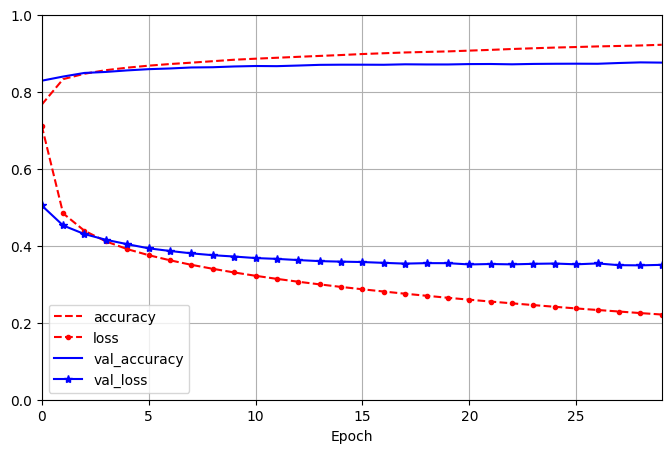

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8726 - loss: 0.3702


[0.36862877011299133, 0.8725000023841858]

In [23]:
# Using the model to make predictions

X_new = X_test[:3] # first 3 instances of test set
y_proba = model.predict(X_new) # for each instance, it gives one probability per class
y_proba.round(2) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.02, 0.  , 0.79],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [24]:
y_pred = y_proba.argmax(axis=-1) # argmax will give the class with highest probability for each instance
y_pred

array([9, 2, 1])

In [25]:
np.array(class_names)[y_pred] # corresponding class names

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [26]:
y_new = y_test[:3]
y_new # actual classes

array([9, 2, 1], dtype=uint8)

In [27]:
# it is making correct prediction for all the 3 instances selected

In [28]:
# Saving and Restoring a Model
import shutil

shutil.rmtree("my_keras_model.keras", ignore_errors=True) # delete the directory, in case it already exists
model.save("my_keras_model.keras")
model = tf.keras.models.load_model("my_keras_model.keras")

In [29]:
model.save_weights("my_weights.weights.h5")
model.load_weights("my_weights.weights.h5")

In [30]:
# show the list of my_weights.* files
from pathlib import Path
for path in sorted(Path().glob("my_weights.*")):
    print(path)

my_weights.weights.h5


In [31]:
# Using Callbacks

# The fit() method accepts a callbacks argument that lets you specify a list of objects
# that Keras will call at the start and end of training, at the start and end of each epoch,
# and even before and after processing each batch. 

shutil.rmtree("my_checkpoints", ignore_errors=True)  # delete the directory, in case it already exists
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5",
                                                   save_weights_only=True)
# the ModelCheckpoint callback saves checkpoints of your model at regular intervals during training, 
# by default at the end of each epoch
history = model.fit(
    X_train, y_train, epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb])

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9238 - loss: 0.2174 - val_accuracy: 0.8746 - val_loss: 0.3499
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9253 - loss: 0.2136 - val_accuracy: 0.8750 - val_loss: 0.3527
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9266 - loss: 0.2100 - val_accuracy: 0.8748 - val_loss: 0.3531
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9274 - loss: 0.2065 - val_accuracy: 0.8746 - val_loss: 0.3517
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9292 - loss: 0.2031 - val_accuracy: 0.8752 - val_loss: 0.3515
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9308 - loss: 0.1998 - val_accuracy: 0.8748 - val_loss: 0.3541
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9316 - loss: 0.1963 - val_accuracy: 0.8738 - val_loss: 0.3609
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9325 - loss: 0.1934 - 

In [32]:
# EarlyStopping callback 

# It will interrupt training when it measures no progress on the validation set for
# a number of epochs (defined by the patience argument), and it will optionally roll
# back to the best model.

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
     restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
     validation_data=(X_valid, y_valid),
     callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9569 - loss: 0.1290 - val_accuracy: 0.8786 - val_loss: 0.3944
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9582 - loss: 0.1268 - val_accuracy: 0.8790 - val_loss: 0.3959
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9588 - loss: 0.1241 - val_accuracy: 0.8800 - val_loss: 0.3911
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9605 - loss: 0.1220 - val_accuracy: 0.8792 - val_loss: 0.3972
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9612 - loss: 0.1195 - val_accuracy: 0.8810 - val_loss: 0.3988
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9620 - loss: 0.1171 - val_accuracy: 0.8796 - val_loss: 0.4042
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9627 - loss: 0.1149 - val_accuracy: 0.8824 - val_loss: 0.4035
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9636 - loss: 0

In [33]:
# Fine-Tuning Neural Network Hyperparameters

In [34]:
# RandomizedSearchCV

tf.keras.backend.clear_session()
tf.random.set_seed(42)

%pip install -q -U keras_tuner
    

import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2) # no of hidden layers
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256) # no of neurons in each layer
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model


random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 33s]
val_accuracy: 0.7480000257492065

Best val_accuracy So Far: 0.8578000068664551
Total elapsed time: 00h 02m 43s


In [35]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


{'n_hidden': 4,
 'n_neurons': 74,
 'learning_rate': 0.00905127409782462,
 'optimizer': 'adam'}

In [36]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 2 summary
Hyperparameters:
n_hidden: 4
n_neurons: 74
learning_rate: 0.00905127409782462
optimizer: adam
Score: 0.8578000068664551


In [37]:
best_trial.metrics.get_last_value("val_accuracy")

0.8578000068664551

In [38]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6085 - loss: 5.4586
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2701 - loss: 1.9019
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2173 - loss: 1.7778
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1676 - loss: 2.3079
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1872 - loss: 2.1940
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1941 - loss: 2.0410
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1937 - loss: 2.0367
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1932 - loss: 2.0357
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1935 - loss: 2.0353
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1932 - loss: 2.0350
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1914 - loss: 2.0477


In [39]:
# if you want to fine-tune data preprocessing hyperparameters, or model.fit() arguments, e.g., batch size
# use kt.HyperModel class and define 2 methods, build() and fit()
# build() will simply call build_model() defined above
# fit() takes a HperParameters object and a compiled model, as well as all model.fit() arguments, and fits the model and returns history

class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            # if true then standarize the training data
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [40]:
# pass instance of this class instead of build_model to the tuner

hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [41]:
%pip install -q -U tensorboard-plugin-profile

shutil.rmtree("my_logs", ignore_errors=True)

from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [42]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 46s]
val_accuracy: 0.8406000137329102

Best val_accuracy So Far: 0.8733999729156494
Total elapsed time: 00h 20m 45s


In [43]:
# Load TensorBoard extension
%load_ext tensorboard

# Start TensorBoard
%tensorboard --logdir {root_logdir}

In [44]:
import sys
if "google.colab" in sys.modules:
    from google.colab import output

    output.serve_kernel_port_as_window(6006)
else:
    from IPython.display import display, HTML

    display(HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>'))